In [39]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import sklearn
from sklearn.preprocessing import LabelEncoder

In [ ]:
"""weather_df = weather_df.drop('Loud Cover', axis=1)
weather_df.to_csv('weatherHistory.csv', index=False)"""

In [ ]:
#sns.barplot(data=insurance_df, x='smoker', y='charges');

In [83]:
weather_df = pd.read_csv('weatherHistory.csv')
le = LabelEncoder()
weather_df['summary_encoded'] = le.fit_transform(weather_df['Summary'])


weather_df.head(10)

,Formatted Date,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,summary_encoded
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.,19
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.,19
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.,17
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.,19
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.,17
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,9.222222,7.111111,0.85,13.9587,258,14.9569,1016.66,Partly cloudy throughout the day.,19
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,7.733333,5.522222,0.95,12.3648,259,9.9820,1016.72,Partly cloudy throughout the day.,19
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,8.772222,6.527778,0.89,14.1519,260,9.9820,1016.84,Partly cloudy throughout the day.,19
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,10.822222,10.822222,0.82,11.3183,259,9.9820,1017.37,Partly cloudy throughout the day.,19
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,13.772222,13.772222,0.72,12.5258,279,9.9820,1017.22,Partly cloudy throughout the day.,19


In [62]:
weather_df.shape

(96453, 11)

In [63]:
weather_df.isnull().sum()

Formatted Date              0
Summary                     0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
summary_encoded             0
dtype: int64

In [25]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [35]:
weather_df.summary_encoded.corr(weather_df['Temperature (C)'])

np.float64(0.14665786200018133)

Text(0.5, 1.0, 'Correlation Matrix')

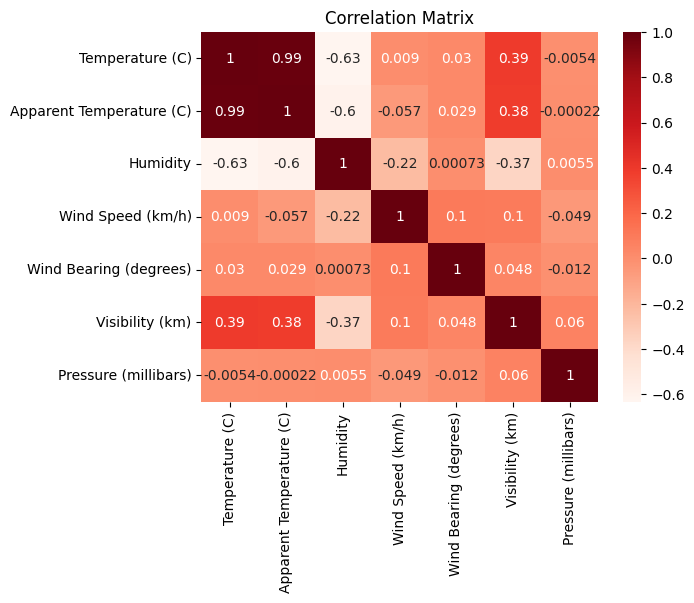

In [49]:
sns.heatmap(weather_df.select_dtypes(include='number').corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

In [51]:
fig = px.histogram(weather_df, 
                   x='Apparent Temperature (C)', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of Apparent Temperature (C)')
fig.update_layout(bargap=0.1)
fig.show()

In [67]:
weather_df.select_dtypes(include='number').corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),summary_encoded
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447,0.146658
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219,0.142760
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454,-0.113119
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263,0.004258
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651,0.022789
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818,0.140138
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000,0.143405
summary_encoded,0.146658,0.142760,-0.113119,0.004258,0.022789,0.140138,0.143405,1.000000


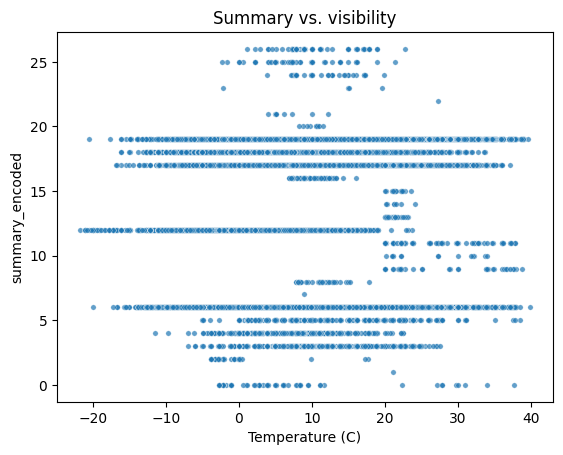

In [69]:
plt.title('Summary vs. visibility')
sns.scatterplot(data=weather_df, x='Temperature (C)', y='summary_encoded', alpha=0.7, s=15);    

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
numerical_input = ['Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
input, output = weather_df[numerical_input], weather_df['summary_encoded']
lin_reg_model = LinearRegression()
lin_reg_model.fit(input, output)
lin_reg_model.intercept_, lin_reg_model.coef_

(np.float64(9.29052011338258),
 array([ 0.16546966, -0.10590739, -0.33091916, -0.01302714,  0.00078117,
         0.08767594,  0.00520413]))

In [ ]:
#predict
def rmse(targets, estimated): 
        return np.sqrt(np.mean((targets - estimated) ** 2))
predictions = lin_reg_model.predict(input)
predictions_int = predictions.astype(int)
weather_predictions = le.inverse_transform(predictions_int)
weather_predictions



array(['Light Rain', 'Light Rain', 'Light Rain', ..., 'Mostly Cloudy',
       'Light Rain', 'Light Rain'], shape=(96453,), dtype=object)

In [80]:
def predict_your_weather(my_data): #they input as list
    my_data = np.array(my_data).reshape(1, -1)
    prediction = lin_reg_model.predict(my_data)
    prediction_int = prediction.astype(int)
    weather_prediction = le.inverse_transform(prediction_int)
    return weather_prediction[0]
    

In [82]:
predict_your_weather([9, 8, 0.82, 11.5, 255, 15, 1015]) 

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



'Light Rain'